In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('supermarket_sales_clean.csv')

In [4]:
df.sample(10)

,city,time,product_line,unit_price,quantity,tax_5%,total,payment,customer_type,gender,rating,cogs,gross_income
520,mandalay,2019-03-15 10:50:00,health_and_beauty,92.78,1,4.6390,97.4190,credit card,normal,male,9.8,92.78,4.6390
508,mandalay,2019-03-03 12:25:00,food_and_beverages,73.05,10,36.5250,767.0250,credit card,member,female,8.7,730.50,36.5250
400,mandalay,2019-01-26 20:23:00,home_and_lifestyle,25.55,4,5.1100,107.3100,ewallet,normal,male,5.7,102.20,5.1100
425,mandalay,2019-02-02 15:34:00,food_and_beverages,46.55,9,20.9475,439.8975,ewallet,member,male,6.4,418.95,20.9475
698,naypyitaw,2019-01-17 12:36:00,health_and_beauty,62.82,2,6.2820,131.9220,ewallet,member,female,4.9,125.64,6.2820
968,naypyitaw,2019-09-02 17:15:00,home_and_lifestyle,15.95,6,4.7850,100.4850,credit card,member,female,5.1,95.70,4.7850
705,naypyitaw,2019-01-19 11:43:00,electronic_accessories,56.13,4,11.2260,235.7460,ewallet,normal,female,8.6,224.52,11.2260
8,yangon,2019-01-03 10:22:00,electronic_accessories,45.48,10,22.7400,477.5400,credit card,normal,female,4.8,454.80,22.7400
594,mandalay,2019-06-01 19:46:00,home_and_lifestyle,62.19,4,12.4380,261.1980,ewallet,normal,male,4.3,248.76,12.4380
430,mandalay,2019-02-03 12:40:00,home_and_lifestyle,88.39,9,39.7755,835.2855,cash,member,female,6.3,795.51,39.7755


In [5]:
df.dtypes

city              object
time              object
product_line      object
unit_price       float64
quantity           int64
tax_5%           float64
total            float64
payment           object
customer_type     object
gender            object
rating           float64
cogs             float64
gross_income     float64
dtype: object

In [6]:
df['time'] = pd.to_datetime(df['time'])

In [7]:
df.select_dtypes(include=['object']).columns

Index(['city', 'product_line', 'payment', 'customer_type', 'gender'], dtype='object')

In [8]:
df.select_dtypes(include=[np.number]).columns

Index(['unit_price', 'quantity', 'tax_5%', 'total', 'rating', 'cogs',
       'gross_income'],
      dtype='object')

In [9]:
sample=pd.DataFrame(data=df.sample(100,random_state=100))
sample

,city,time,product_line,unit_price,quantity,tax_5%,total,payment,customer_type,gender,rating,cogs,gross_income
249,yangon,2019-04-03 15:27:00,home_and_lifestyle,33.30,9,14.9850,314.6850,ewallet,normal,female,7.2,299.70,14.9850
353,mandalay,2019-01-14 12:09:00,food_and_beverages,99.69,5,24.9225,523.3725,cash,normal,female,9.9,498.45,24.9225
537,mandalay,2019-03-20 13:02:00,fashion_accessories,99.25,2,9.9250,208.4250,cash,normal,male,9.0,198.50,9.9250
424,mandalay,2019-02-01 20:08:00,sports_and_travel,44.63,6,13.3890,281.1690,credit card,normal,male,5.1,267.78,13.3890
564,mandalay,2019-03-29 14:28:00,health_and_beauty,61.29,5,15.3225,321.7725,cash,member,male,7.0,306.45,15.3225
...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,mandalay,2019-03-27 19:18:00,sports_and_travel,93.39,6,28.0170,588.3570,ewallet,normal,male,10.0,560.34,28.0170
134,yangon,2019-02-25 16:21:00,sports_and_travel,63.69,1,3.1845,66.8745,cash,normal,male,6.0,63.69,3.1845
101,yangon,2019-02-14 17:03:00,electronic_accessories,99.56,8,39.8240,836.3040,credit card,normal,female,5.2,796.48,39.8240
265,yangon,2019-06-01 11:51:00,fashion_accessories,42.57,7,14.8995,312.8895,cash,normal,female,6.8,297.99,14.8995


## Plotting the Data

In [10]:
sns.set_theme(style='darkgrid',palette='magma',)

### Relational Plots

Scatter Plot

<Axes: xlabel='cogs', ylabel='rating'>

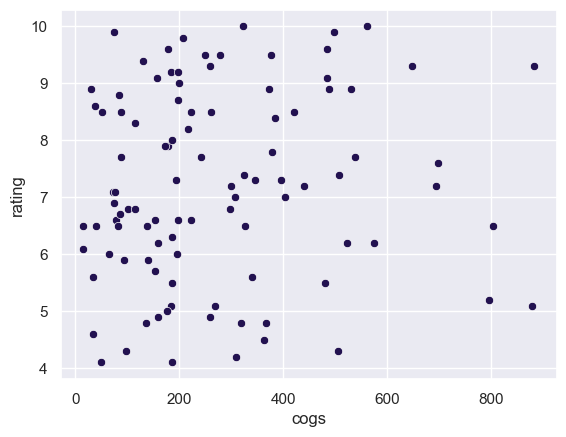

In [11]:
sns.scatterplot(data=sample, x='cogs', y='rating')

Line Plot

<Axes: xlabel='time', ylabel='total'>

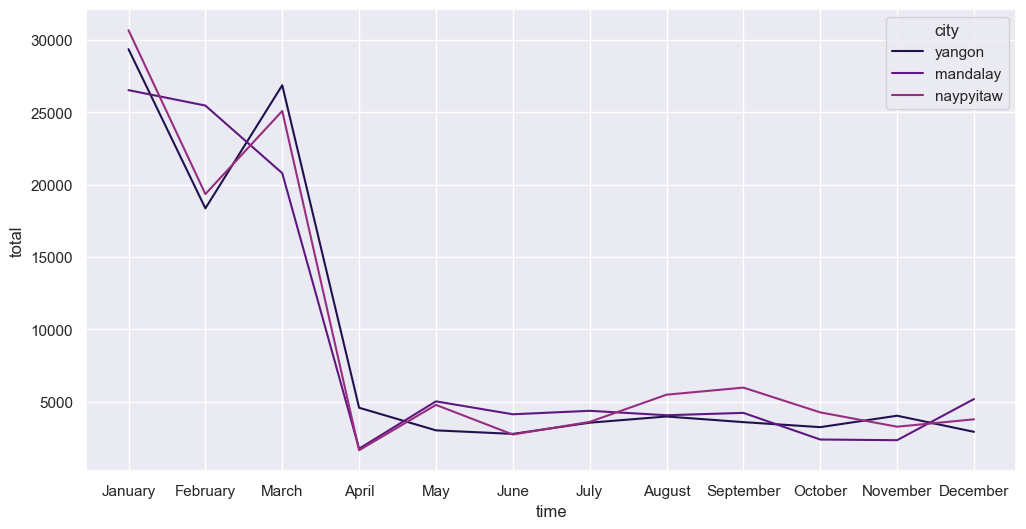

In [12]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['time'].dt.month_name(),y=df['total'],hue=df['city'],errorbar=None,estimator='sum')

Relational Plot

<Figure size 1200x600 with 0 Axes>

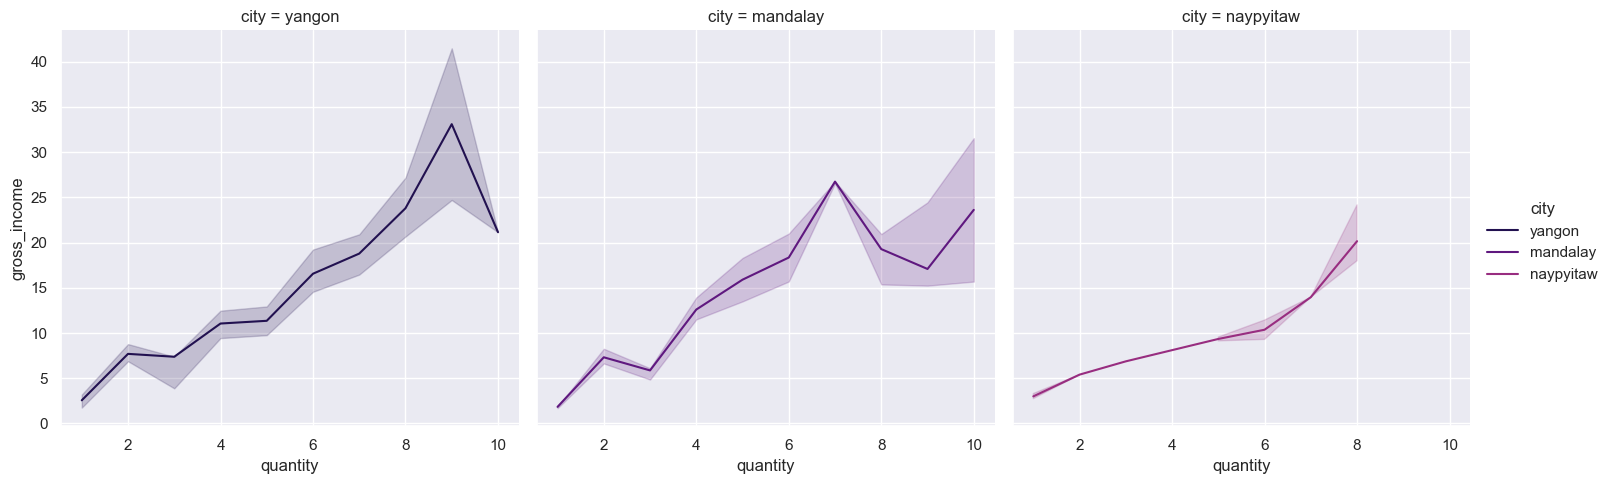

In [13]:
plt.figure(figsize=(12,6)) 
sns.relplot(data=sample, x='quantity', y='gross_income',kind='line',hue='city',col='city',errorbar=('ci',50))

### Categorical Plots

Bar Plot

<Axes: xlabel='city', ylabel='gross_income'>

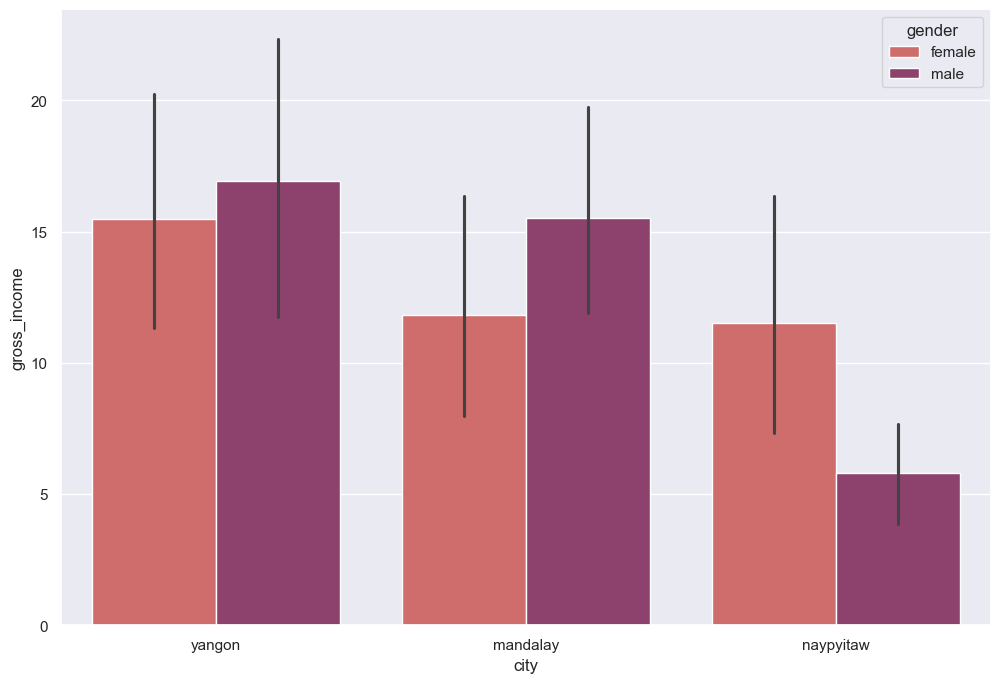

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(data=sample, x='city', y='gross_income',hue='gender',estimator='mean',palette='flare')


Count Plot

In [15]:
sample['product_line'].value_counts(normalize=True).sort_values(ascending=False)

product_line
home_and_lifestyle        0.19
food_and_beverages        0.18
sports_and_travel         0.18
fashion_accessories       0.17
health_and_beauty         0.14
electronic_accessories    0.14
Name: proportion, dtype: float64

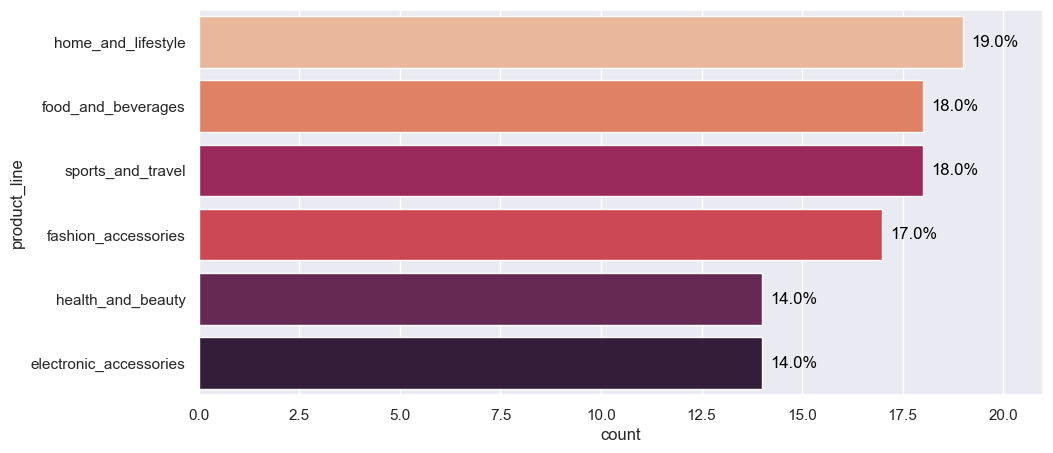

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(data=sample,y='product_line',palette='rocket_r',order=sample['product_line'].value_counts().index,hue='product_line')
plt.xlim(0,21)
for index, value in enumerate(sample['product_line'].value_counts(normalize=True).sort_values(ascending=False)):
    plt.text( (value * 100 ) + .2 , index , str(f'{round(value * 100,ndigits=3)}%'), ha= 'left', va = 'center' ,fontsize=12,color='black') 
plt.tight_layout(pad=5)
plt.show()

Strip Plot

<Axes: xlabel='product_line', ylabel='gross_income'>

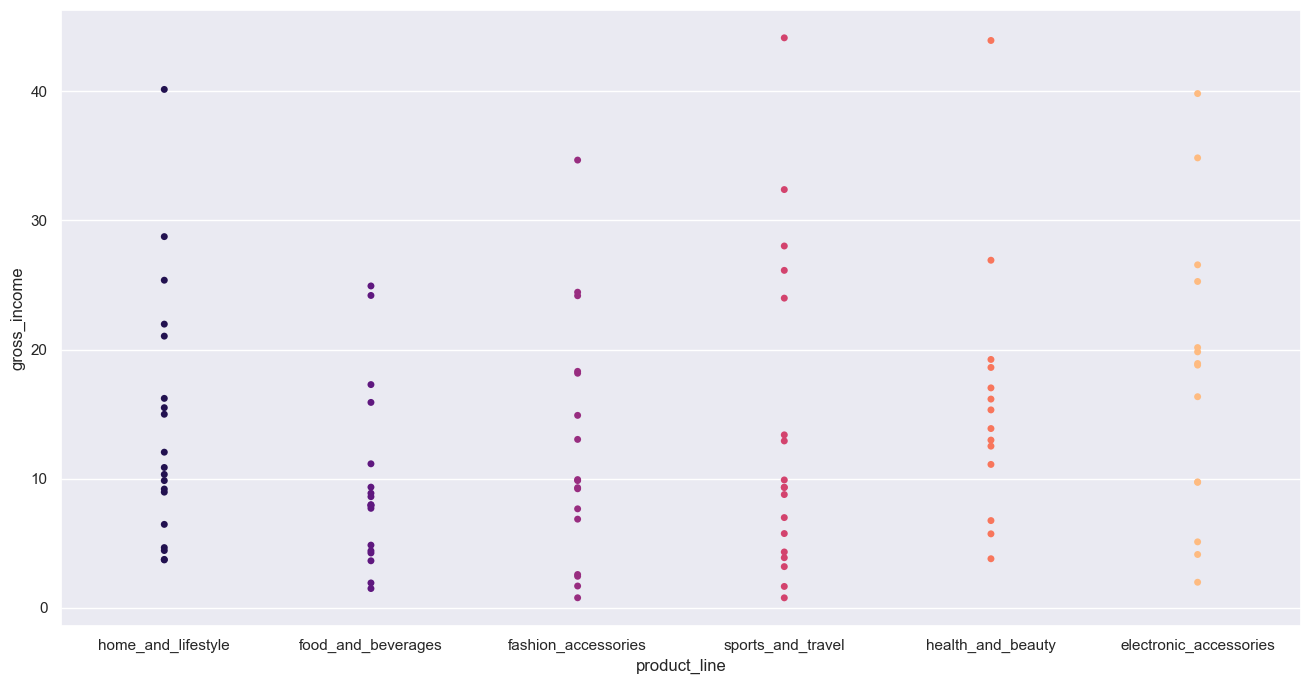

In [17]:
plt.figure(figsize=(16,8))
sns.stripplot(data=sample,x='product_line', y='gross_income',hue='product_line',jitter=0)

Box Plot

<Axes: xlabel='product_line', ylabel='unit_price'>

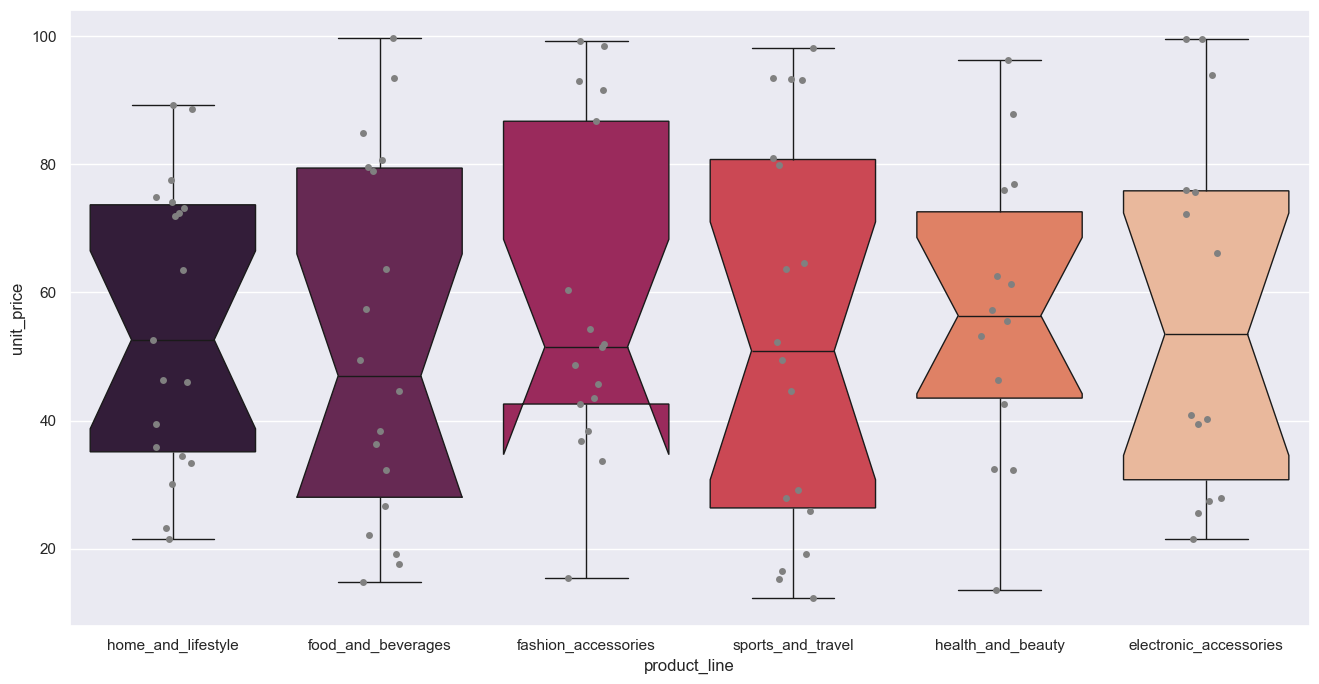

In [18]:
plt.figure(figsize=(16,8))
sns.boxplot(data=sample,y='unit_price',hue='product_line',x="product_line",whis=1.5,notch=True,palette='rocket')
sns.stripplot(data=sample,y='unit_price',x='product_line',jitter=True,color='0.5')

Swarm Plot

<Axes: xlabel='gender', ylabel='total'>

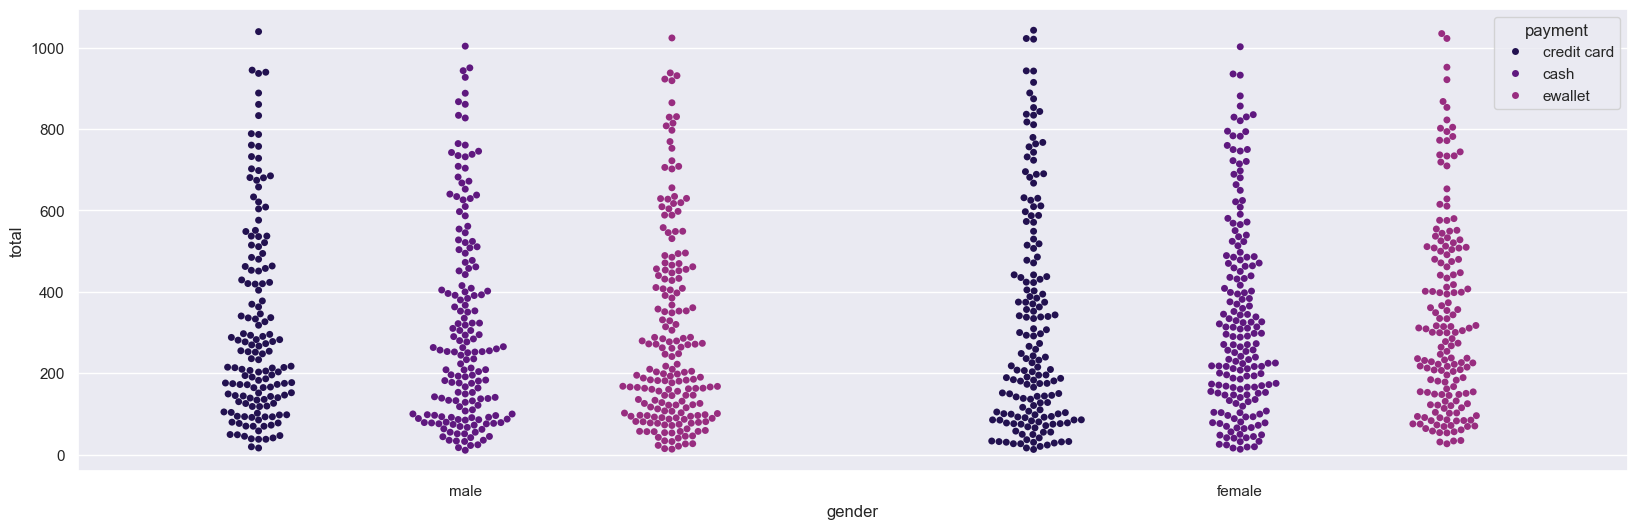

In [19]:
plt.figure(figsize=(20,6))
sns.swarmplot(hue=df['payment'],y=df['total'],x=df['gender'],dodge=True)

Joint Plot

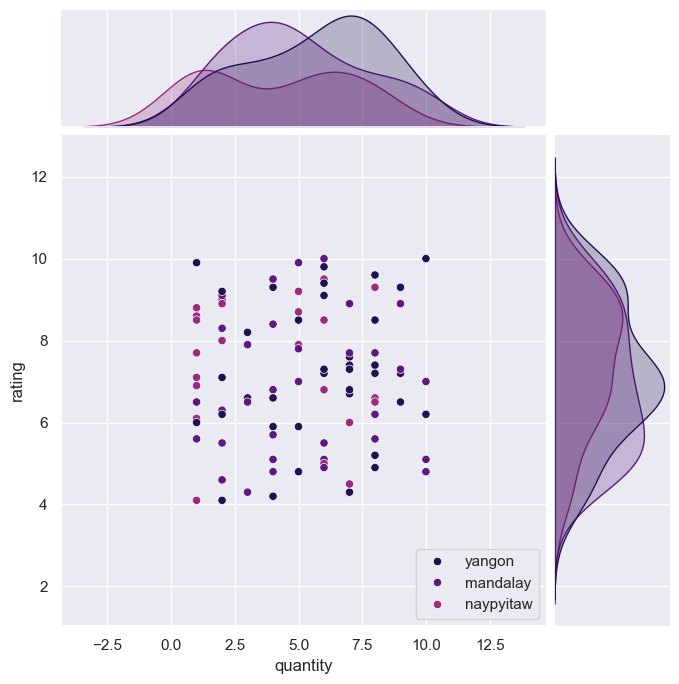

In [20]:
sns.jointplot(data=sample, y='rating', x='quantity',kind='scatter',hue='city',height=7,ratio=4,space=0.07,)
plt.legend(loc='lower right')

Violin Plot

<Axes: xlabel='gross_income', ylabel='city'>

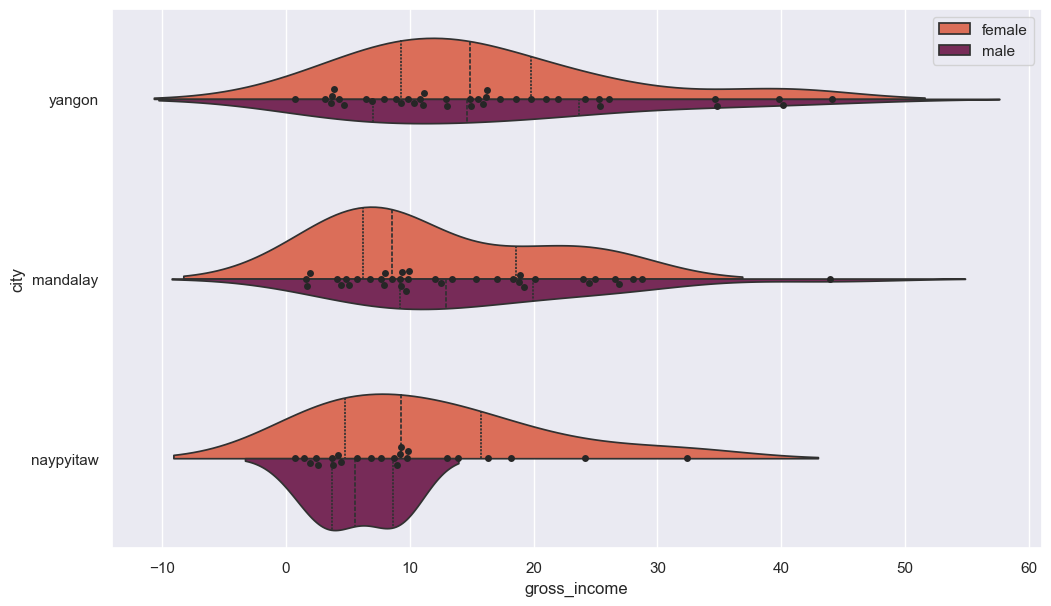

In [21]:
plt.figure(figsize=(12,7))
sns.violinplot(data=sample, y='city', x='gross_income',hue='gender',split=True,palette='rocket_r',inner='quarter')
sns.swarmplot(data=sample, y='city', x='gross_income',color='0.15')

Facet Grid 

<Figure size 1200x700 with 0 Axes>

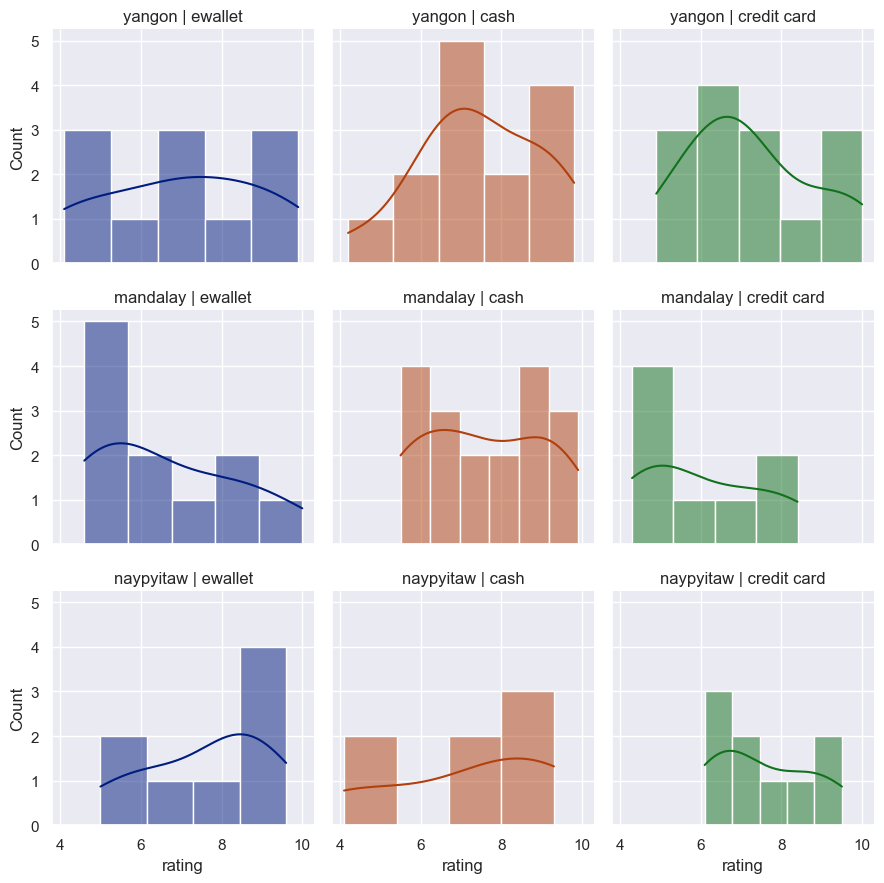

In [22]:
plt.figure(figsize=(12,7))
sns.FacetGrid(data=sample,row='city',hue='payment',sharey=True,col='payment',palette='dark' ).map(sns.histplot,'rating',kde=True,).set_titles('{row_name} | {col_name}')

Cat Grid

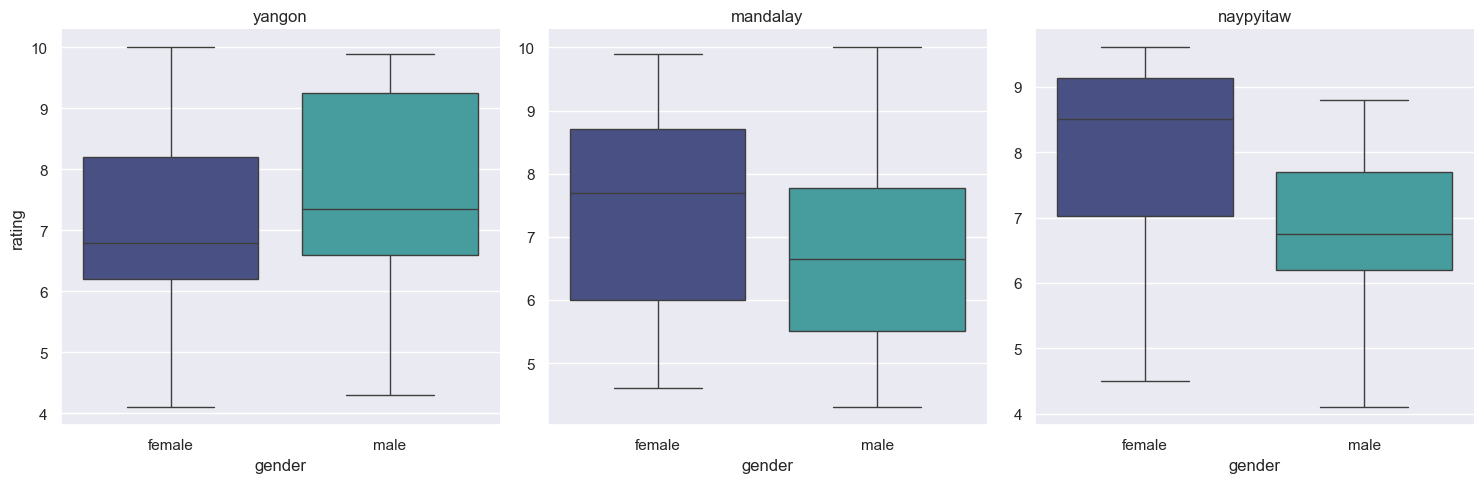

In [23]:
sns.catplot(data=sample,y='rating',kind='box',x='gender',height=5,col='city',palette='mako',hue='gender',sharey=False,).set_titles('{col_name}')

### Distribution Plots

Histogram

<Axes: xlabel='unit_price', ylabel='Count'>

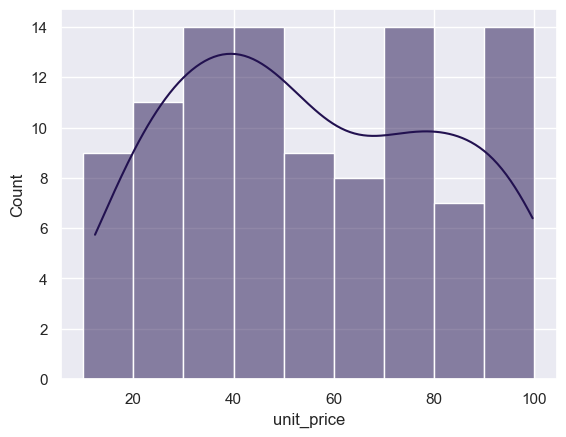

In [24]:
sns.histplot(data=sample,x='unit_price',kde=True,binwidth=10,binrange=(10,100),stat='count',discrete=False)

<Axes: xlabel='unit_price', ylabel='Count'>

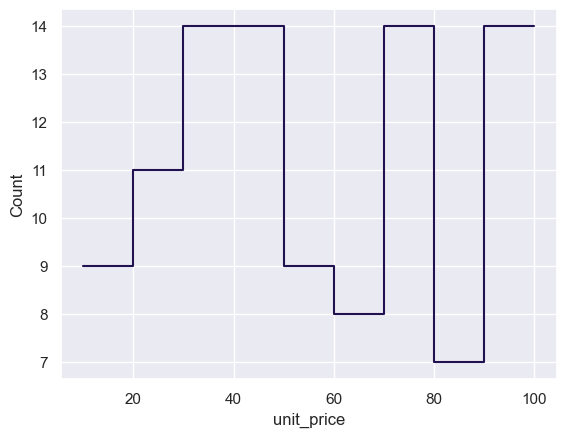

In [25]:
sns.histplot(data=sample,x='unit_price',binwidth=10,binrange=(10,100),stat='count',discrete=False,element='step',fill=False)

<Axes: xlabel='unit_price', ylabel='Count'>

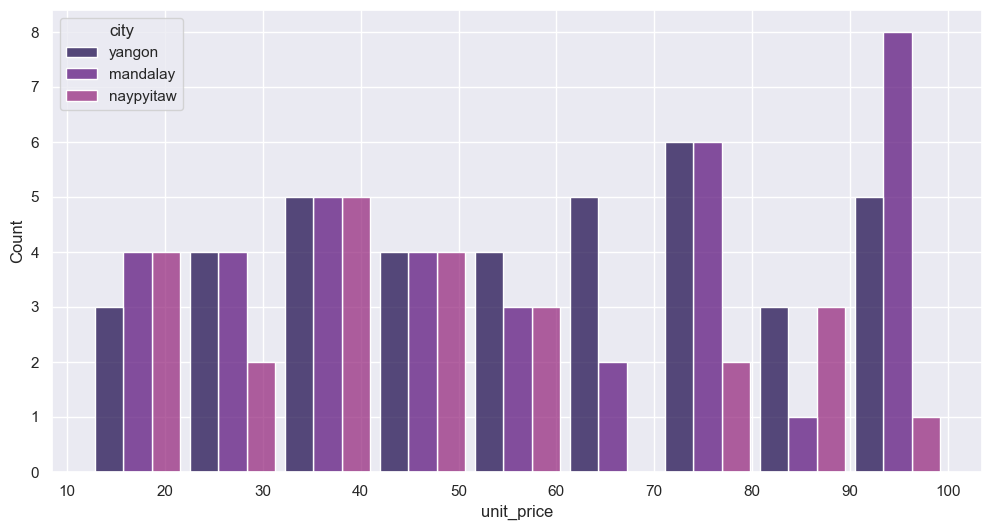

In [26]:
plt.figure(figsize=(12,6))
plt.xticks(range(10,101,10))
sns.histplot(data=sample,x='unit_price',binwidth=10,hue='city',multiple='dodge',shrink=0.9) 



<Axes: xlabel='gross_income', ylabel='rating'>

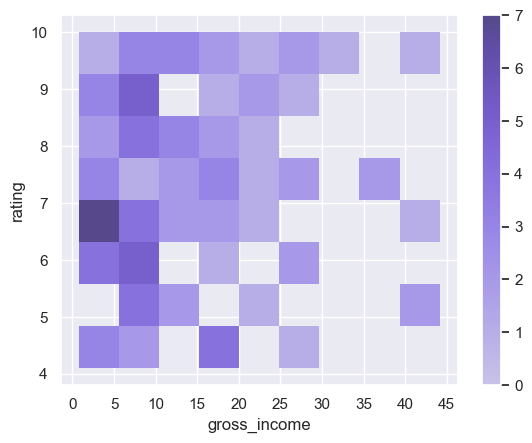

In [27]:
plt.xticks(range(0,101,5))
sns.histplot(data=sample,x='gross_income',y='rating',cbar=True,stat='count') 

Kernal Density Estimation 

<Axes: xlabel='unit_price', ylabel='Density'>

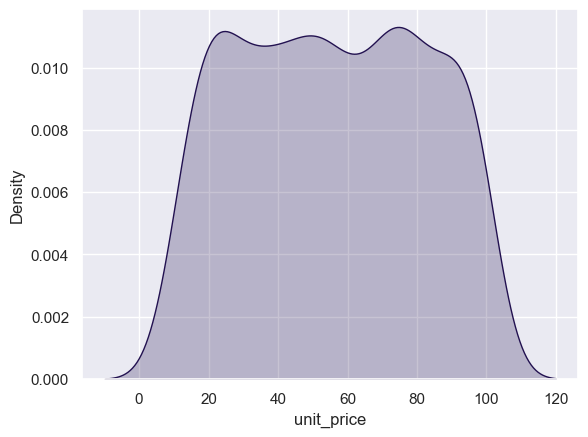

In [28]:
sns.kdeplot(df['unit_price'],fill=True)

Kernal Density Estimation (bivariate)

<Axes: xlabel='unit_price', ylabel='gross_income'>

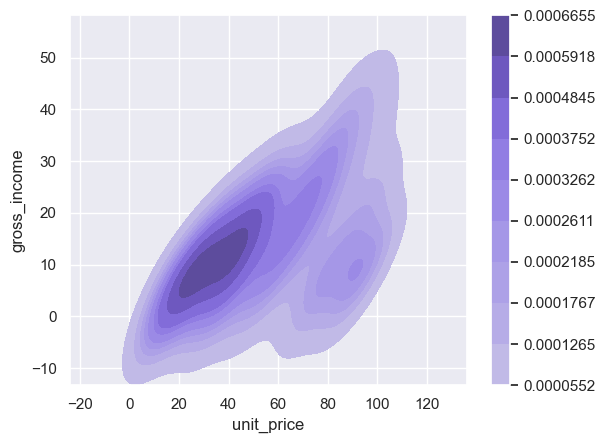

In [29]:
sns.kdeplot(data=sample,x='unit_price', y='gross_income',fill=True,cbar=True,)

ECDF Plot

<Axes: xlabel='gross_income', ylabel='Proportion'>

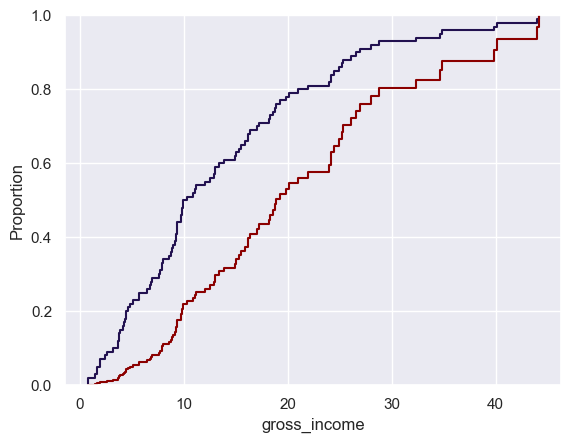

In [30]:
sns.ecdfplot(data=sample,x='gross_income')
sns.ecdfplot(data=sample,x='gross_income',weights='gross_income',color='darkred')


Regresion Plot

<Axes: xlabel='unit_price', ylabel='rating'>

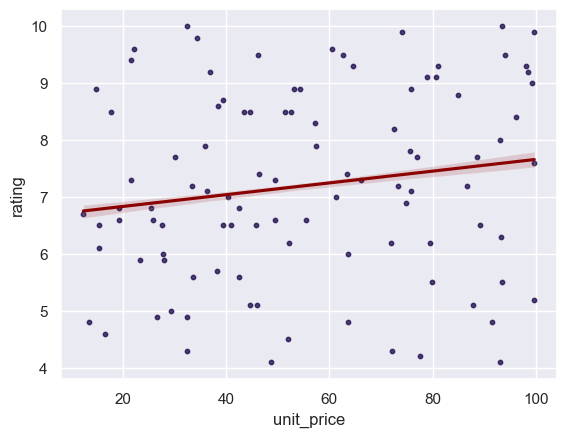

In [31]:
sns.regplot(data=sample,x='unit_price',y='rating',scatter_kws={'s':10},line_kws={'color':'darkred'},ci=30)

Rug Plot

<Axes: xlabel='rating', ylabel='Density'>

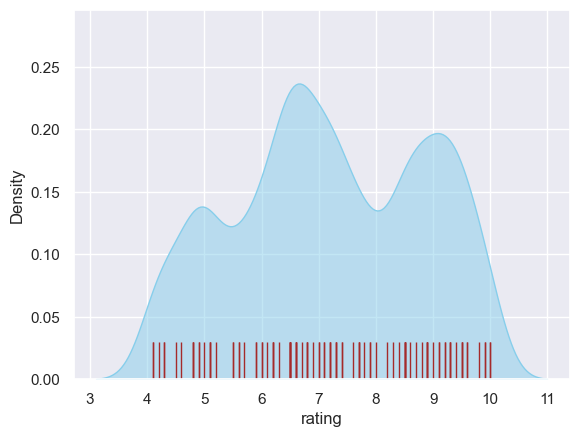

In [38]:
sns.kdeplot(sample, bw_adjust=0.5, x='rating',fill=True, color='skyblue', alpha=0.5)
sns.rugplot(data=sample, x= 'rating',color='brown', height=0.1)

